# Idea #1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(15,7)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [2]:
# np.random.seed(200) #-- works for lin reg
# np.random.seed(110)

# Data

In [3]:
data=pd.read_csv('DATA.csv')
data

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion,FG_no,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion,0,4.515185,0.950185,4.515185,...,0.565426,0.984436,0.004060,0.175744,0.824256,203.025746,952.211108,1155.236854,2.590521,3.469194e-10
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion,1,4.694722,0.939167,4.694722,...,0.414850,0.964725,0.001641,0.263258,0.754145,459.636664,1316.701291,1745.953265,2.894724,2.616881e-02
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion,1,4.631574,0.939167,4.631574,...,0.652689,0.991067,0.003116,0.133363,0.880800,282.693153,1867.057219,2119.729166,3.186999,2.147342e-02
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion,14,5.844735,0.671994,5.844735,...,0.480865,0.974914,0.002627,0.222582,0.777534,296.015256,1034.054046,1329.914576,2.672942,1.638895e-04
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion,14,5.700164,0.714890,5.700164,...,0.620758,0.988920,0.003874,0.148451,0.851582,219.819135,1260.983509,1480.753866,2.820395,4.615913e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion,15,11.230655,-1.013112,11.230655,...,0.573428,0.985310,0.000926,0.170773,0.857589,925.652115,4648.439587,5420.359453,3.928670,3.827094e-02
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion,15,11.151935,-0.893097,11.151935,...,0.215618,0.852354,0.000234,0.522965,0.525738,2250.280048,2262.214379,4302.929844,3.517875,6.432619e-02
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion,15,10.985181,-0.970500,10.985181,...,0.654730,0.991202,0.001018,0.132357,0.891029,874.926498,5890.018831,6610.353674,4.333218,3.206787e-02
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion,15,11.524990,-1.915802,11.524990,...,0.258234,0.916344,0.000251,0.400392,0.652081,2601.278722,4236.464502,6496.833550,3.857006,7.038922e-02


In [4]:
data.describe()

,Redox Potential,FG_no,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,Asphericity,Eccentricity,InertialShapeFactor,NPR1,NPR2,PMI1,PMI2,PMI3,RadiusOfGyration,SpherocityIndex
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,-1.418162,11.935135,8.357724,0.017421,8.357724,0.334495,0.459133,251.739665,243.822778,251.563366,...,0.500161,0.971588,0.001784,0.221606,0.784182,610.600835,2082.169005,2671.017908,3.239580,7.662502e-03
std,0.680095,4.536819,2.312979,0.749930,2.312979,0.276733,0.105647,47.312133,49.239681,47.301247,...,0.121475,0.022609,0.000944,0.080213,0.075104,421.605569,902.824560,1170.596904,0.345794,1.758956e-02
min,-2.390000,0.000000,4.515185,-4.419993,4.515185,0.000190,0.164131,180.210000,172.146000,180.068748,...,0.215618,0.852354,0.000234,0.083447,0.514366,203.025746,952.211108,1155.236854,2.590521,0.000000e+00
25%,-1.950000,7.000000,5.893783,-0.305331,5.893783,0.111088,0.377663,225.207000,214.167000,225.053826,...,0.414234,0.963966,0.001017,0.161627,0.741396,342.256821,1507.190675,1911.638128,2.996801,0.000000e+00
50%,-1.690000,14.000000,9.197306,0.209964,9.197306,0.268600,0.447395,240.270000,228.174000,240.112344,...,0.500315,0.977462,0.001650,0.211111,0.789642,470.306717,1833.624000,2266.577105,3.159866,7.747000e-09
75%,-0.820000,15.000000,9.685346,0.485710,9.685346,0.496068,0.563308,270.204000,264.156000,270.038905,...,0.593490,0.986852,0.002394,0.266024,0.840122,714.304016,2427.479278,3167.604263,3.430181,5.252499e-04
max,0.800000,20.000000,13.411611,0.954259,13.411611,1.660140,0.644787,540.186000,540.186000,539.949374,...,0.770550,0.996512,0.004060,0.522965,0.916553,2952.179383,7167.909370,9650.125026,4.333218,8.608742e-02


In [5]:
X=data.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
y=data['Redox Potential']
print(X.shape,y.shape)

(185, 145) (185,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True,
                                                    test_size=0.30)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 145) (129,)
(56, 145) (56,)


# Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Baseline Models

### 1. Linear Regression

R^2 = -8226.660085993808


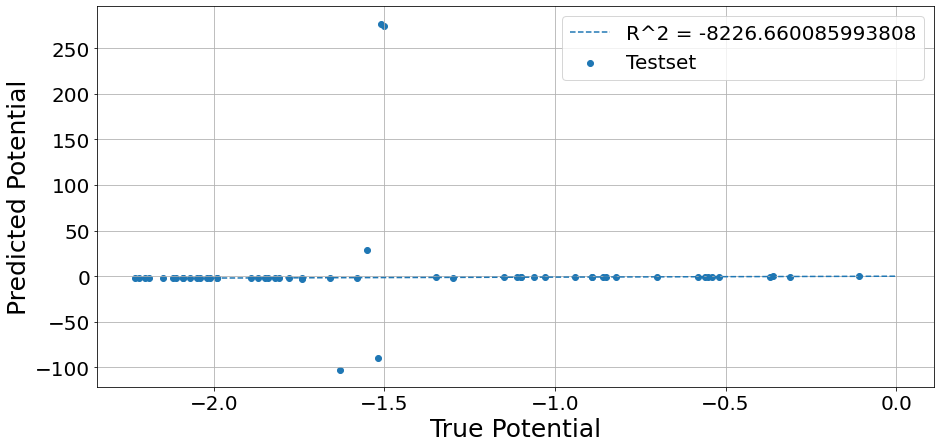

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred=reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

### 2. SVR

R^2 = 0.9428901128008401


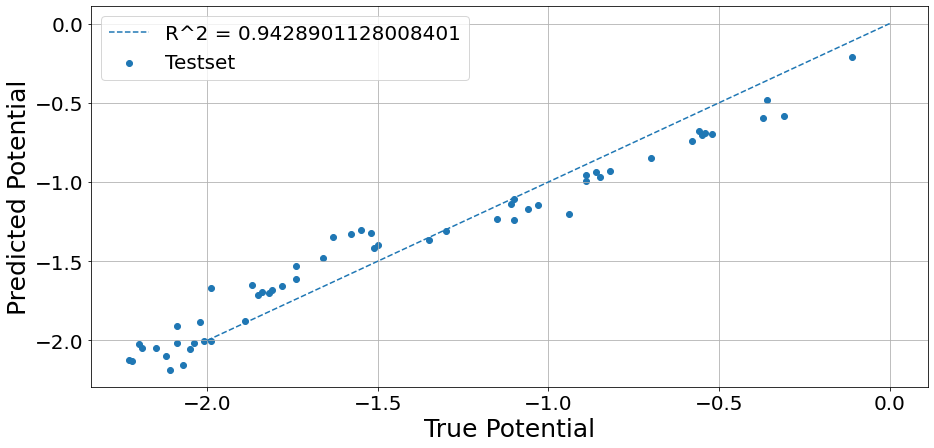

In [9]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled, y_train)

y_pred=svr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

### 3. Gradent Boosting Regression

R^2 = 0.9847103330715855


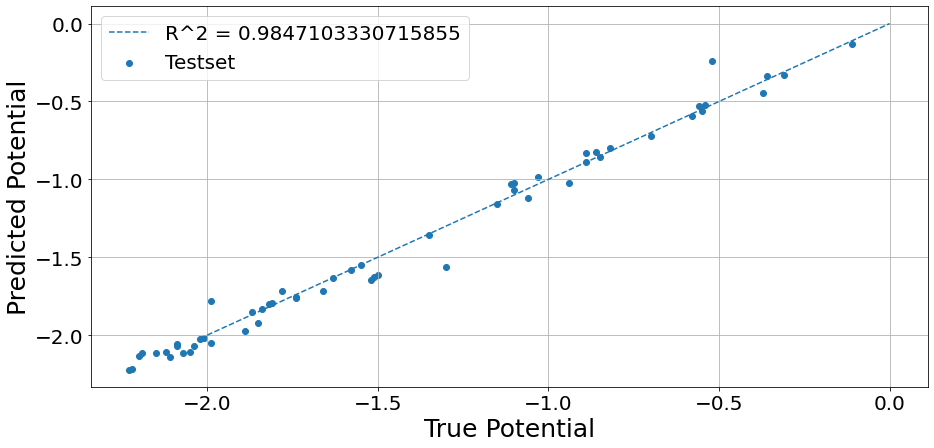

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled, y_train)

y_pred=gbr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

# Comparative Study - Multiple Models

## Performance on Testset

In [33]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models_dict_unopt={#('linear_reg',LinearRegression(),
             'ridge':Ridge(),
             'lasso':Lasso(),
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':ElasticNet(),
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':LassoLars(),
             'omp':OrthogonalMatchingPursuit(),
             'bayesian_ridge':BayesianRidge(),
             'ARDR':ARDRegression(),
             'PA':PassiveAggressiveRegressor(),
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':HuberRegressor(epsilon=1,
                                     alpha=1e-3,
                                     tol=1e-6,
                                     max_iter=50000),
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':KernelRidge(kernel='rbf'),
             'SVR':SVR(),
             'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
             'decision_tree':DecisionTreeRegressor(),
             'bagging':BaggingRegressor(n_jobs=-1),
             'random_forest':RandomForestRegressor(),
             'ada_boost':AdaBoostRegressor(),
             'gradient_boosting_reg':GradientBoostingRegressor(),
#              'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
             'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
                                            max_iter=10000),
             'knn_reg':KNeighborsRegressor()
            }

num_folds=10
models_data_unopt={'model_name':[],'mse_cv':[],'mse_testset':[]}
pbar=tqdm(models_dict_unopt.items())
for model_name,model in pbar:
    pbar.set_description(model_name)
    scores=cross_val_score(model,
                           X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(X_train_scaled, y_train)
    y_pred=reg_model.predict(X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    models_data_unopt['model_name'].append(model_name)
    models_data_unopt['mse_cv'].append(mean_score)
    models_data_unopt['mse_testset'].append(mse_testset)

df=pd.DataFrame.from_dict(models_data_unopt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Model Performance (CV)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Model Performance (Test-Set)')

huber:  42%|████▏     | 8/19 [00:03<00:04,  2.27it/s]         


KeyboardInterrupt: 

# Hyper-parameter Tuning (Model Optimization)

In [72]:
%%time
from IPython import display
from sklearn.model_selection import GridSearchCV

param_grid_dict={#('linear_reg',LinearRegression(),
             'ridge':{'alpha':[0.5,1,1.5],
                      'tol':[1e-3,1e-4,1e-5],
                      'max_iter':[500,1000,5000],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                     },
             'lasso':{'alpha':[0.5,0.8,1,1.5,1.5],
                      'positive':[True,False],
                      'tol':[1e-3,1e-4,1e-5,1e-6],
                      'max_iter':[500,1000,5000],
                     },
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':{'alpha':[0.5,1,1.5],
                            'l1_ratio':[0.2,0.5,0.8],
                            'positive':[True,False],
                            'tol':[1e-3,1e-4,1e-5],
                            'max_iter':[500,1000,5000]
                           },
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':{'alpha':[0.5,1,1.5,2],
                            'jitter':[None,0.1,1,10,100],
                            'positive':[True,False],
                            'max_iter':[500,1000,5000,10000]
                           },
             'omp':{'n_nonzero_coefs':#[None,5,10,20,50],
                    'tol':[0.1,1e-2,1e-3,1e-4,1e-5,1e-6]
                   },
             'bayesian_ridge':{'n_iter':[200,300,500],
                               'tol':[1e-2,1e-3,1e-4],
                               'alpha_1':[1e-5,1e-6,1e-7],
                               'alpha_2':[1e-5,1e-6,1e-7],
                               'lambda_1':[1e-5,1e-6,1e-7],
                               'lambda_2':[1e-5,1e-6,1e-7],
                              },
             'ARDR':{'n_iter':[200,300,500],
                     'tol':[1e-2,1e-3,1e-4],
                     'alpha_1':[1e-5,1e-6,1e-7],
#                      'alpha_2':[1e-5,1e-6,1e-7],
                     'lambda_1':[1e-5,1e-6,1e-7],
#                      'lambda_2':[1e-5,1e-6,1e-7],
#                      'threshold_lambda':[5000,10000,20000]
                    },
             'PA':{'C':[0.5,1,1.5],
                   'max_iter':[500,1000,5000],
                   'tol':[1e-2,1e-3,1e-4,1e-6],
                   'early_stopping':[True,False]
                  },
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':{'epsilon':[1,1.35,1.5],
                      'alpha':[1e-3,1e-4,1e-5],
                      'tol':[1e-5,1e-6,1e-7],
                      'max_iter':[1000,50000]
                     },
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                             'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                             'alpha':[0.01,0.1,1,5,10,100]
                            },
             'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                    'C':[0.5,1,1.5],
                    'tol':[1e-2,1e-3,1e-4],
                    'gamma':['scale','auto']
                   },
             'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                           RBF()+WhiteKernel(),
                                           34.4**2 * RBF(length_scale=41.8)
                                            + 3.27**2 * RBF() * ExpSineSquared()
                                            + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                            + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                           ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                          ],
                                 'alpha':[1e-9,1e-10,1e-11]
                                },
             'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
#                               'splitter':['best','random'],
#                               'max_features':['auto', 'sqrt', 'log2'],
                              'ccp_alpha':[0,0.1,0.5,1],
                              'max_depth':[None,2,3,10,20,50]
                             },
             'bagging':{'n_estimators': np.arange(50,1000,50),
                        'bootstrap':[True,False],
                        'bootstrap_features':[True,False],
                        'oob_score':[True,False]
                       },
             'random_forest':{'n_estimators': np.arange(50,501,50),
                              'bootstrap':[True,False],
                              'oob_score':[True,False],
#                               'criterion':['mse', 'mae'],
#                               'max_features':['auto', 'sqrt', 'log2'],
#                               'ccp_alpha':[0,0.5,1]
                              },
             'ada_boost':{'n_estimators': np.arange(50,501,50),
                          'learning_rate':[0.5,1,1.5],
                          'loss':['linear', 'square', 'exponential']
                         },
             'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
#                                       'learning_rate':[0.5,1,1.5],
                                      'n_estimators': np.arange(50,501,50),
#                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                      'max_depth':[2,3,10,20,50],
#                                       'max_features':['auto', 'sqrt', 'log2'],
#                                       'alpha':[0.6,0.9,1.2],
                                      'tol':[1e-2,1e-3,1e-4],
#                                       'ccp_alpha':[0.5,1,1.5]
                                     },
#              'hist_gradient_boosting_reg':{},
             'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                               'activation':['identity', 'logistic', 'tanh', 'relu'],
                               'solver':['lbfgs', 'sgd', 'adam'],
                               'learning_rate':['constant', 'invscaling', 'adaptive'],
                               'early_stopping':[True,False]
                              },
             'knn_reg':{'n_neighbors':np.arange(1,10,2),
                        'weights':['uniform', 'distance'],
                        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size':[40,50,75]
                       }
            }

models_dict_opt={}
opt_params_dict={}
results_dict={'model_name':[],
              'r2_unopt':[],'r2_opt':[],
              'mse_unopt':[],'mse_opt':[],
              'best_model_type':[],
              'opt_params':[],
              'best_model':[]
             }
scoring = ['neg_mean_squared_error','r2']

# test_model='lasso_lars'
# for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
# pbar=tqdm(param_grid_dict.items())
#     pbar.set_description(model_name)
for model_name,param_grid in param_grid_dict.items():

    print(model_name)
    unopt_estimator=models_dict_unopt[model_name]
    gs = GridSearchCV(unopt_estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=False,
                  cv=10,
                  verbose=2,
                  n_jobs=-1
                 )
    gs.fit(X_train_scaled, y_train)
    #unopt
    unopt_estimator=unopt_estimator.fit(X_train_scaled, y_train)
    y_pred_unopt=unopt_estimator.predict(X_test_scaled)
    mse_unopt=mean_squared_error(y_test,y_pred_unopt)
    r2_unopt=r2_score(y_test,y_pred_unopt)
    #opt
    opt_estimator=gs.best_estimator_
    y_pred_opt=opt_estimator.predict(X_test_scaled)
    mse_opt=mean_squared_error(y_test,y_pred_opt)
    r2_opt=r2_score(y_test,y_pred_opt)
    #data
    models_dict_opt[model_name]=opt_estimator
#     opt_params_dict[model_name]=gs.best_params_
    results_dict['model_name'].append(model_name)
    results_dict['mse_unopt'].append(mse_unopt)
    results_dict['r2_unopt'].append(r2_unopt)
    results_dict['mse_opt'].append(mse_opt)
    results_dict['r2_opt'].append(r2_opt)
    best_model_type='opt' if r2_opt>r2_unopt else 'unopt'
    best_model=opt_estimator if r2_opt>r2_unopt else unopt_estimator
    results_dict['best_model_type'].append(best_model_type)
    results_dict['opt_params'].append(gs.best_params_)
    results_dict['best_model'].append(best_model)
    print(r2_unopt,r2_opt)
    
clear_output()
opt_models_data_df=pd.DataFrame.from_dict(results_dict)
opt_models_data_df

ridge
Fitting 10 folds for each of 189 candidates, totalling 1890 fits
0.9874164597870447 0.9868749376743942
lasso
Fitting 10 folds for each of 54 candidates, totalling 540 fits
-0.0004249653505370432 0.39982598134438896
elastic_net
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
0.3290823413972276 0.9312795381440746
lasso_lars
Fitting 10 folds for each of 160 candidates, totalling 1600 fits
-0.0004249653505370432 -0.0004249653505370432
omp
Fitting 10 folds for each of 20 candidates, totalling 200 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_omp.py:391: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


0.9809485995192365 -28197.387252524644
bayesian_ridge
Fitting 10 folds for each of 729 candidates, totalling 7290 fits
0.9874758766933317 0.9874758903311472
ARDR
Fitting 10 folds for each of 81 candidates, totalling 810 fits
0.9816706328996558 0.9816706622924648
PA
Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.9811413303763645 0.9850457017529756
huber
Fitting 10 folds for each of 54 candidates, totalling 540 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9871258237951028 0.9823470351153845
kernel_ridge
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -1.20986618e+03 -4.97930644e-01 -5.01451115e-01
 -5.06332992e-01 -5.07107393e-01 -1.24941619e+02             nan
 -1.20986618e+03 -4.17242392e-01 -4.44206381e-01 -4.86437179e-01
 -4.93763544e-01 -1.24941619e+02             nan -1.20986618e+03
 -1.44832122e-01 -1.95357420e-01 -3.44070040e-01 -3.88549719e-01
 -1.24941619e+02             nan -1.20986618e+03 -1.57285544e-02
 -2.29537189e-02 -8.01389728e-02 -1.08903945e-01 -1.24941619e+02
             nan -1.20986618e+03 -6.54402156e-03 -1.29583437e-02
 -1.31926293e-02 -9.78562766e-03 -1.24941619e+02             nan
 -1.20986618e+03 -6.12916462e-03 -6.64369380e-03 -1.82609830e-02
 -1.21289527e-02 -1.24941619e+02             nan -1.06700410e+03
 -5.07531222e-01 -5.07892526e-01 -5.08388878e-01 -5.08463897e-01
 -1.33555810e+01             nan -1.06700410e+03 -4.97919702e-01
 -5.0

0.7574131755595732 0.9884467294564367
SVR
Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.9763504540740217 0.9776939898649405
gaussian_process
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.33848942 -0.00640213 -0.00567091         nan -0.33848943 -0.00640213
 -0.00578172         nan -0.33848943 -0.00640213 -0.00592187         nan]
  category=UserWarning
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.03926577  0.97506798  0.97533812         nan -0.03926578  0.97506798
  0.97463358         nan -0.03926578  0.97506798  0.97427951         nan]
  category=UserWarning
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


0.9797209110699981 0.9878402932711564
decision_tree
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168 -0.50863168
 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821
 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821
 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821 -0.59969821
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         na

0.97827389778122 -0.00042496535053726525
bagging
Fitting 10 folds for each of 152 candidates, totalling 1520 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  category=UserWarning


0.9792641927604775 0.9846134143917739
random_forest
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.01266227 -0.01237202 -0.01189213 -0.01225554 -0.01273595 -0.01182107
 -0.01214506 -0.01211411 -0.0127061  -0.01221385 -0.01203995 -0.01224263
 -0.0124613  -0.01249492 -0.01223795 -0.01200516 -0.01271319 -0.01214229
 -0.01219736 -0.01181411         nan -0.01753683         nan -0.01755627
         nan -0.01730612         nan -0.01732265         nan -0.01738545
         nan -0.01779816         nan -0.01800893         nan -0.01740115
         nan -0.01738157         nan -0.0173624 ]
  category=UserWarning
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.96249902 0.96279936 0.96467795 0.96237139 0.95981288 0.96232388
 0.9618264  0.9634204  0.96107848 0.96231282 0.96296971 0.962289
 0.96199376 0.96216544 0.96309426 0.96269475 0.96064062 0

0.9855694867119905 0.9855239685181065
ada_boost
Fitting 10 folds for each of 90 candidates, totalling 900 fits
0.9677335154966631 0.9680726789088091
gradient_boosting_reg
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
0.9831124888404019 0.9822167356401398
neural_network
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
0.7689355338435366 0.9868781505084376
knn_reg
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
0.9720802918063037 0.9700711394635442


NameError: name 'clear_output' is not defined

In [74]:
opt_models_data_df=pd.DataFrame.from_dict(results_dict)
opt_models_data_df

,model_name,r2_unopt,r2_opt,mse_unopt,mse_opt,best_model_type,best_model
0,ridge,0.987416,0.986875,0.004718,0.004921,unopt,Ridge()
1,lasso,-0.000425,0.399826,0.375120,0.225042,opt,"Lasso(alpha=0.5, max_iter=500, positive=True, ..."
2,elastic_net,0.329082,0.931280,0.251568,0.025767,opt,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=500)"
3,lasso_lars,-0.000425,-0.000425,0.375120,0.375120,unopt,LassoLars()
4,omp,0.980949,-28197.387253,0.007144,10573.279333,unopt,OrthogonalMatchingPursuit()
5,bayesian_ridge,0.987476,0.987476,0.004696,0.004696,opt,"BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la..."
6,ARDR,0.981671,0.981671,0.006873,0.006873,opt,"ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n..."
7,PA,0.981141,0.985046,0.007071,0.005607,opt,"PassiveAggressiveRegressor(C=0.5, max_iter=500..."
8,huber,0.987126,0.982347,0.004827,0.006619,unopt,"HuberRegressor(alpha=0.001, epsilon=1, max_ite..."
9,kernel_ridge,0.757413,0.988447,0.090960,0.004332,opt,"KernelRidge(alpha=0.01, gamma=0.0001, kernel='..."


In [77]:
opt_params_dict['decision_tree']

{'ccp_alpha': 0.5,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto'}

In [73]:
import pickle

with open('OPT_MODELS_DATA_DF.pkl','wb') as outfile:
    pickle.dump(opt_models_data_df,outfile)

### Kernel Ridge Regression

{'alpha': 0.01, 'gamma': 0.0001, 'kernel': 'polynomial'}
R^2 = 0.7574131755595732


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

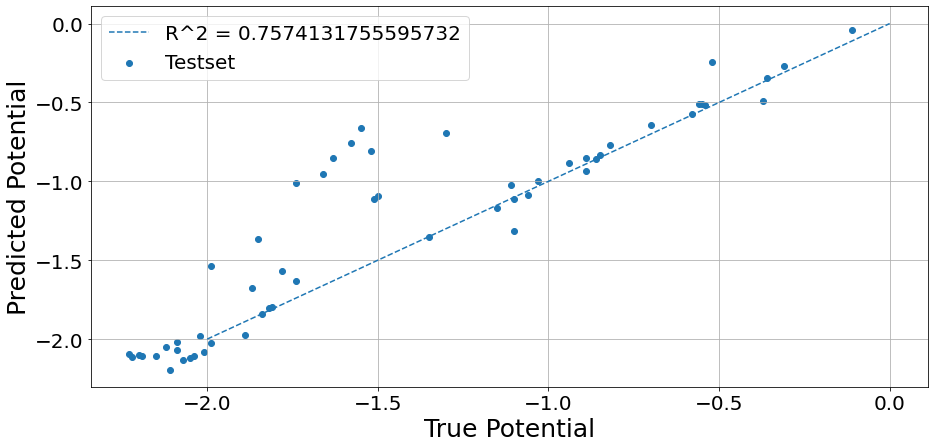

<Figure size 1080x504 with 0 Axes>

In [203]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':[0.01,0.1,1,5,10,100]}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

plt.figure()
y_pred=gs.best_estimator_.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

### Random Forest

{'n_estimators': 250}
R^2 = 0.9867739395288226
R^2 = 0.9851879071739498
CPU times: user 2.66 s, sys: 84 ms, total: 2.74 s
Wall time: 27 s


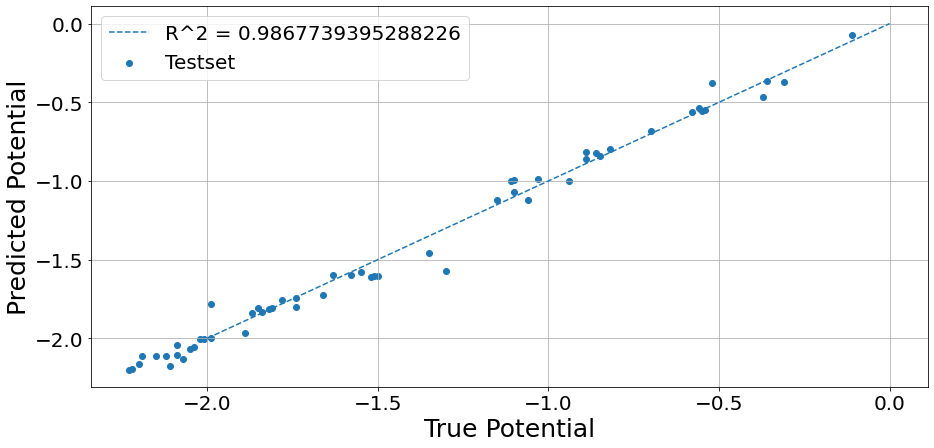

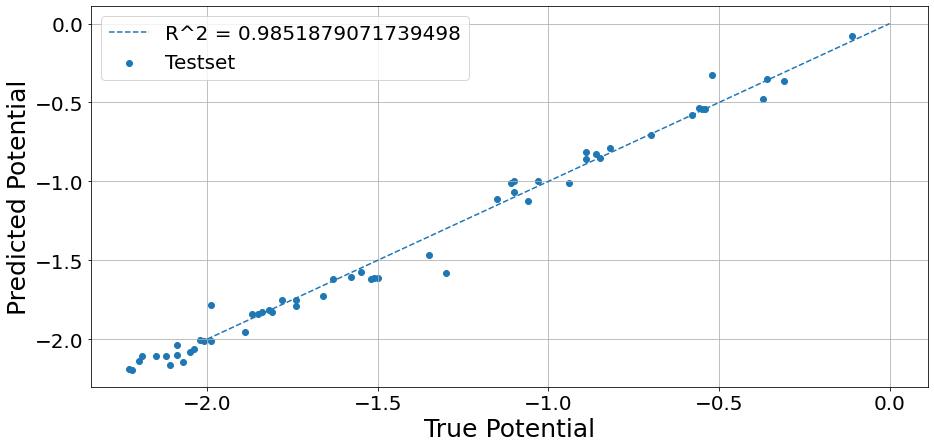

In [202]:
%%time
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {'n_estimators': np.arange(50,1000,50)}

scoring = ['neg_mean_squared_error','r2']

estimator = RandomForestRegressor()

rf_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=2,
                  n_jobs=-1
                 )
rf_gs.fit(X_train_scaled, y_train)
display.clear_output()
print(rf_gs.best_params_)

plt.figure()
rf_reg = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred=rf_reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

plt.figure()
y_pred=gs_rf.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

# Feature Importance

In [170]:
col_idx2name={idx:col for idx,col in enumerate(X.columns)}
col_name2idx={col:idx for idx,col in enumerate(X.columns)}

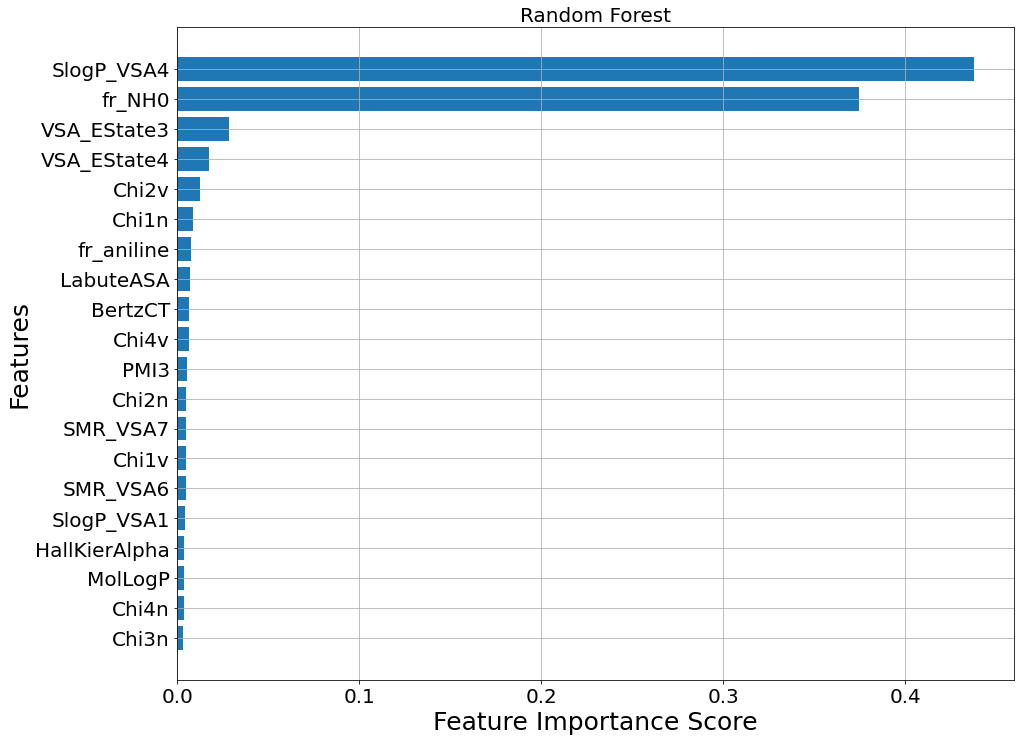

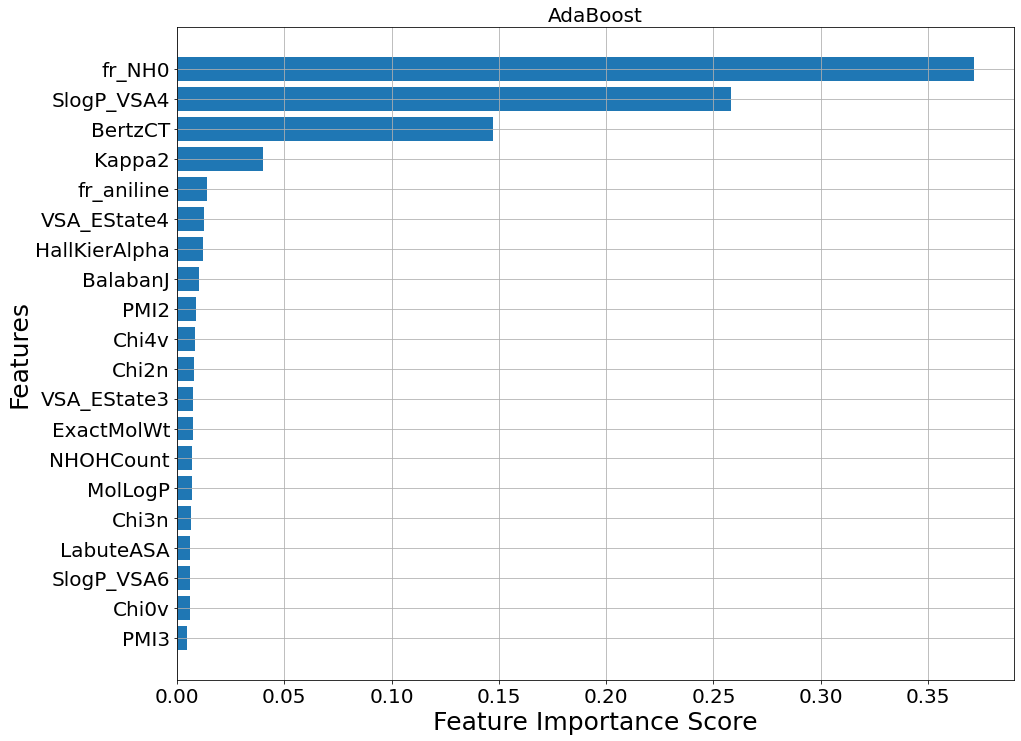

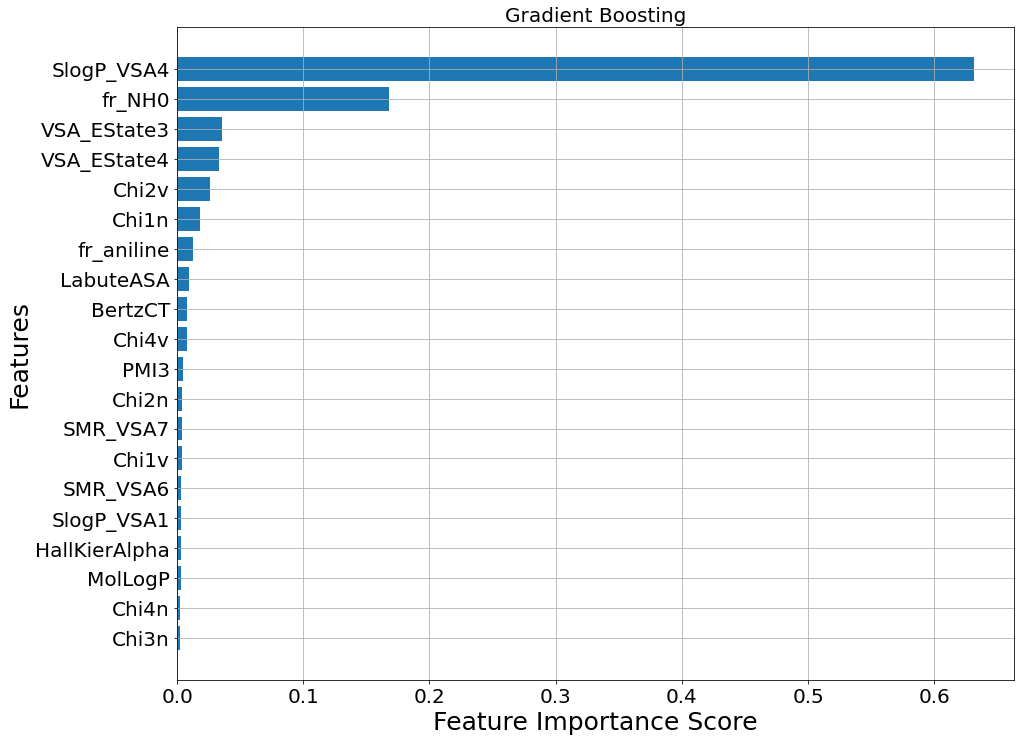

In [176]:
feat_imp_dict={}

ntop=20
rf_reg=opt_models_data_df[opt_models_data_df['model_name']=='random_forest']['best_model'].values[0]
feat_score = rf_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['random_forest_opt']=feat_score_sorted_idx

plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:col_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Random Forest')
plt.show()


adaboost_reg=opt_models_data_df[opt_models_data_df['model_name']=='ada_boost']['best_model'].values[0]      
feat_score = adaboost_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['ada_boost_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:col_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('AdaBoost')
plt.show()

gbt_reg=opt_models_data_df[opt_models_data_df['model_name']=='gradient_boosting_reg']['best_model'].values[0]      
feat_score = gbt_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['gradient_boosting_reg_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:col_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Gradient Boosting')
plt.show()

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

kbest_selector=SelectKBest(mutual_info_regression).fit(X_train_scaled, y_train)
feat_score=kbest_selector.scores_
feat_score_sorted_idx=feat_score.argsort()[::-1]
feat_imp_dict['kbest_selector']=feat_score_sorted_idx

knn_reg: : 19it [00:23,  1.26s/it]              


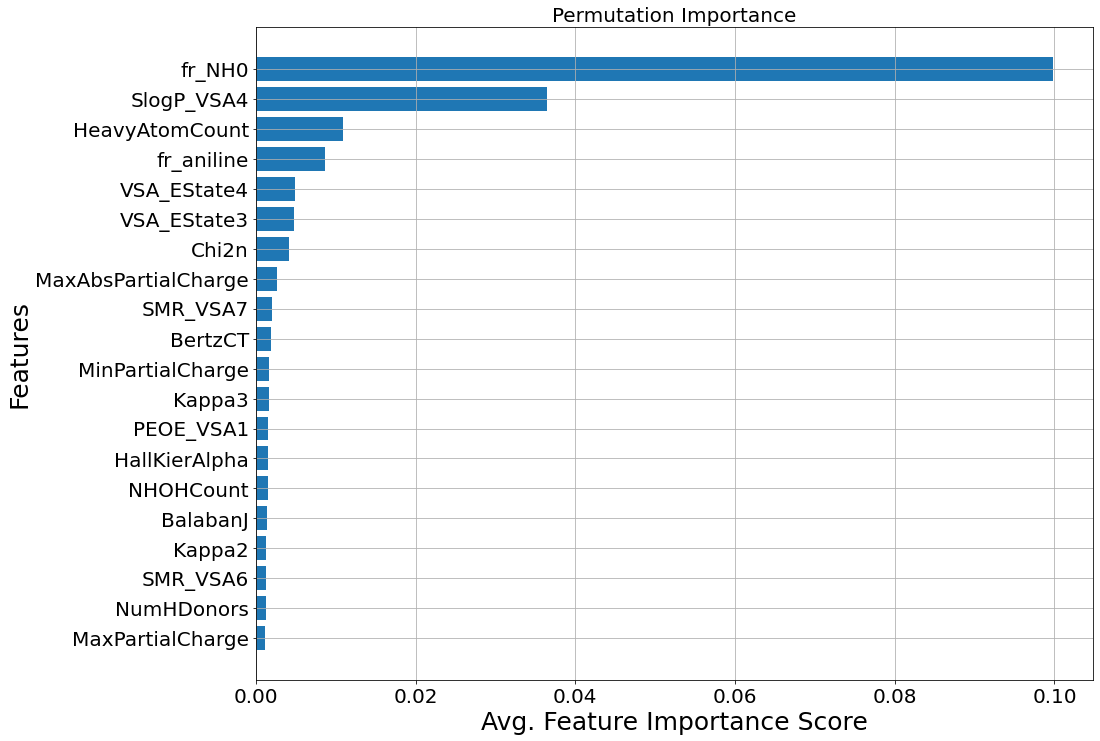

CPU times: user 21.5 s, sys: 23.5 s, total: 44.9 s
Wall time: 24.2 s


In [157]:
%%time
from sklearn.inspection import permutation_importance

pbar=tqdm(opt_models_data_df.iterrows())
avg_feat_score=[]
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    estimator=row['best_model']
    selector = permutation_importance(estimator,
                                      X_train_scaled, y_train,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=-1)
    feat_score=selector.importances_mean
    avg_feat_score.append(feat_score)
    feat_score_sorted_idx=feat_score.argsort()[::-1]
    feat_imp_dict[f'{model_name}_perm_imp']=feat_score_sorted_idx
avg_feat_score=np.array(avg_feat_score).mean(axis=0)
feat_score_sorted_idx=avg_feat_score.argsort()
plt.figure(figsize=(15,12))
features=list(map(lambda x:col_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],avg_feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Avg. Feature Importance Score')
plt.title('Permutation Importance')
plt.show()

In [158]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(opt_models_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx

In [159]:
# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:col_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:col_idx2name[x],feat_ranking))
# features[:22]

## Feature Correlations

In [166]:
rf_top_features[-ntop:].append('Redox Potential')

<AxesSubplot:>

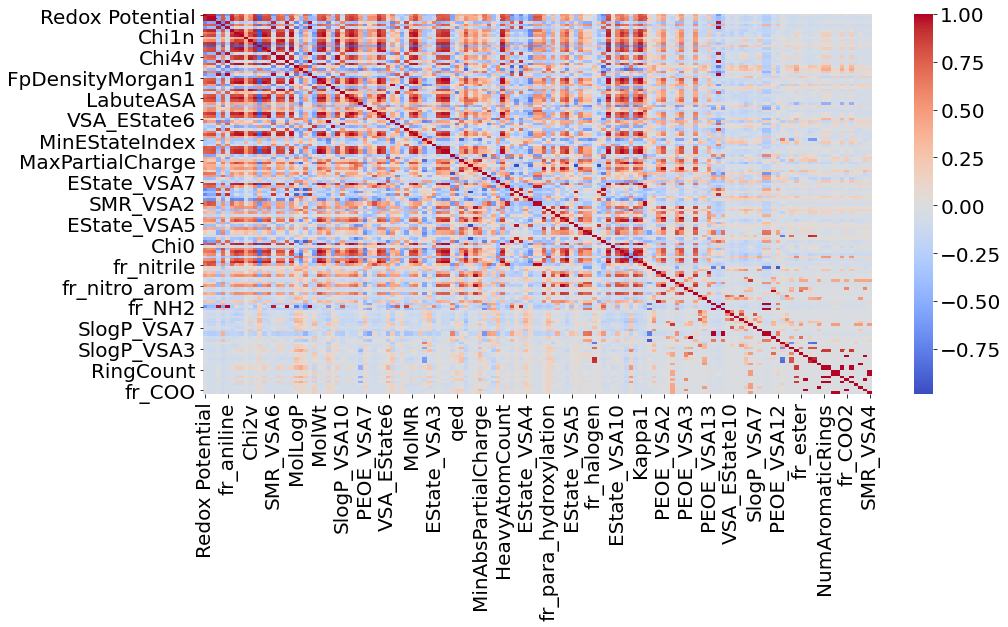

In [195]:
# plt.matshow(corr)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns

pd.options.display.max_rows = 4000
ntop=50
top_features=rf_top_features#[-ntop:]
top_features.append('Redox Potential')

corr = data[top_features[::-1]].corr()
sns.heatmap(corr,cmap='coolwarm')

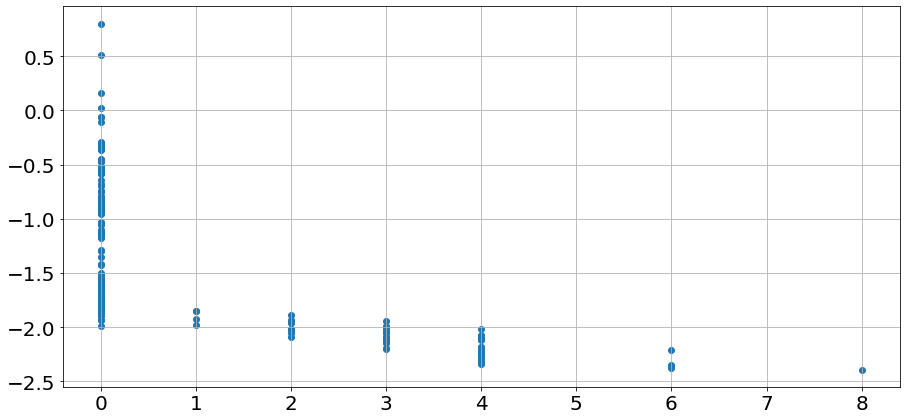

In [182]:
plt.scatter(X['fr_aniline'],y)

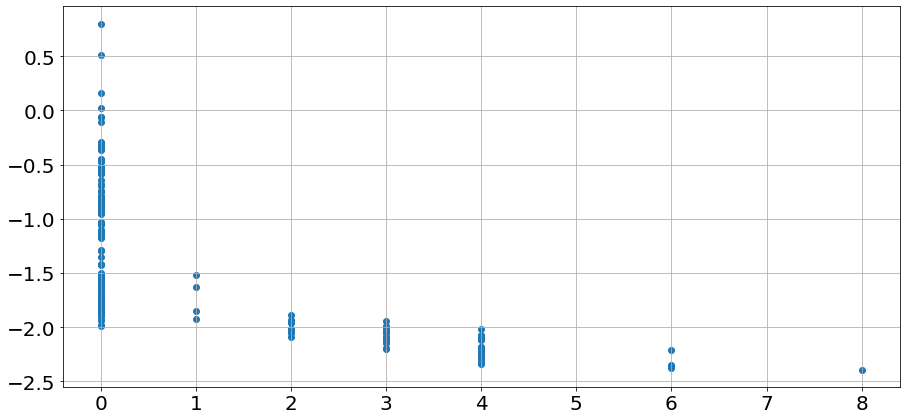

In [183]:
plt.scatter(X['fr_NH2'],y)

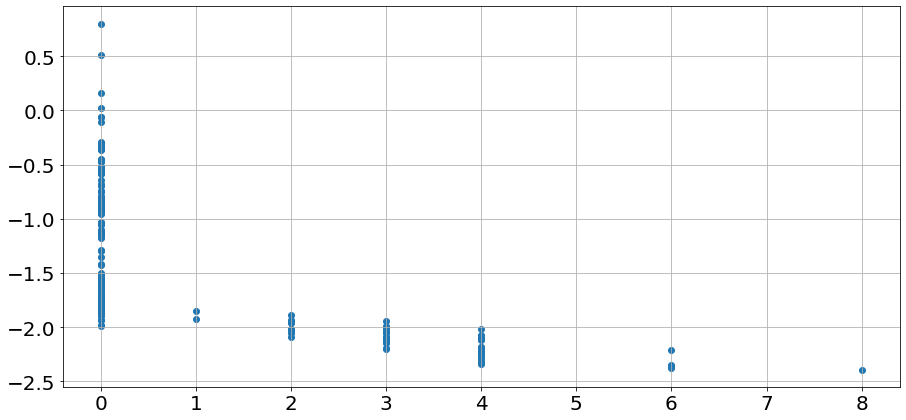

In [184]:
plt.scatter(X['fr_ArN'],y)

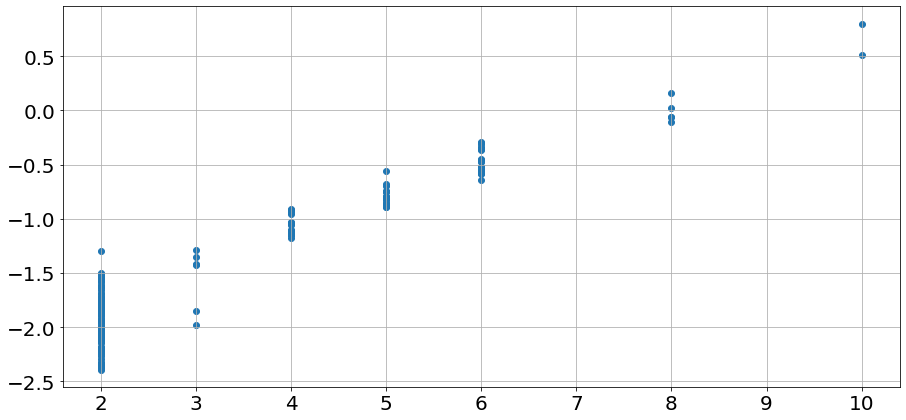

In [185]:
plt.scatter(X['fr_NH0'],y)

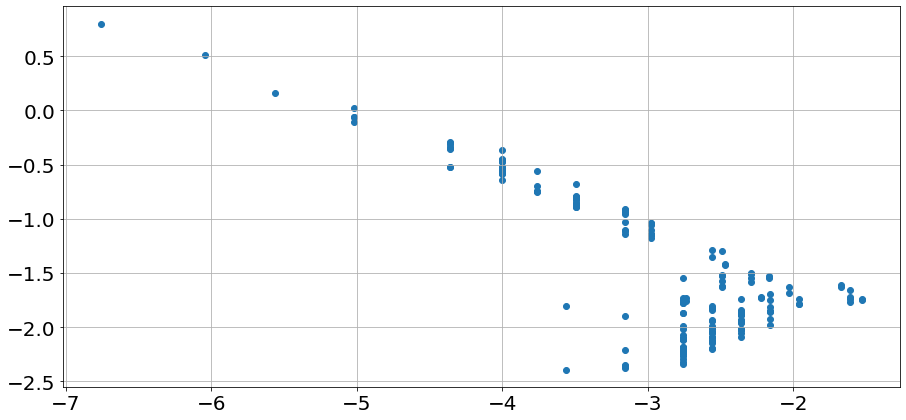

In [186]:
plt.scatter(X['HallKierAlpha'],y)

# **Model Performance on Top 20 Features (add cv)

(129, 145) (56, 145)
R^2 = 0.9816706328996558


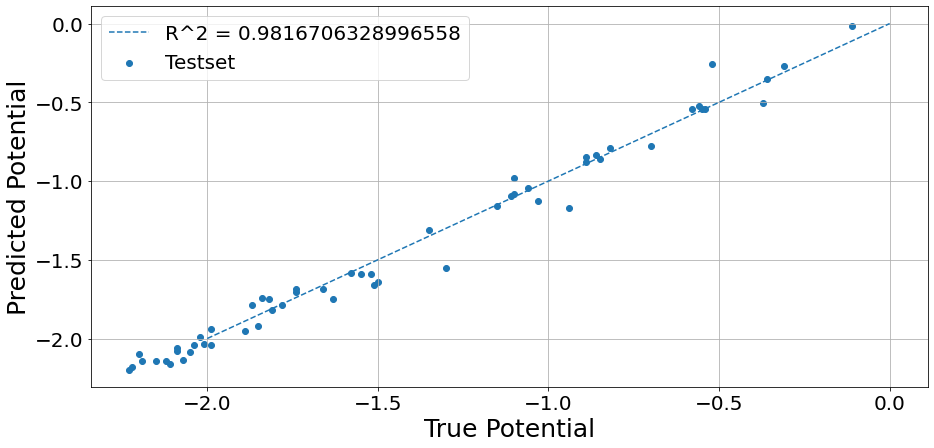

(129, 20) (56, 20)
R^2 = 0.9845767677067888


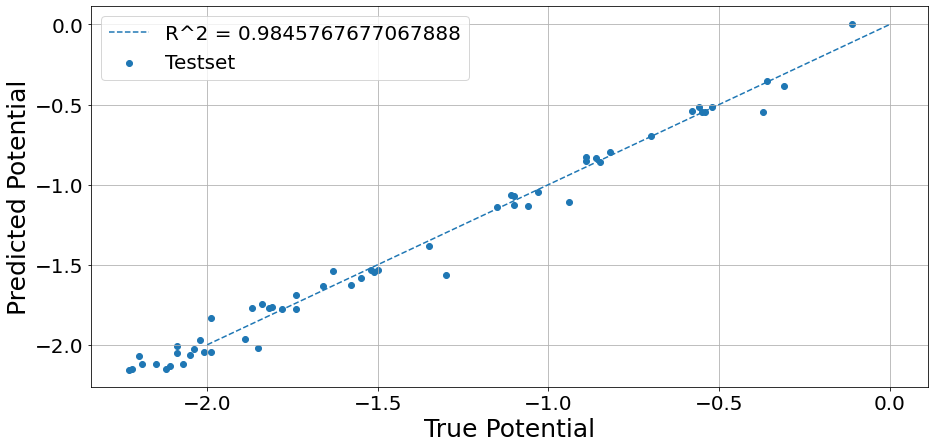

In [178]:
#ARD Regression
from sklearn.linear_model import ARDRegression
print(X_train_scaled.shape,X_test_scaled.shape)
ard_reg = ARDRegression().fit(X_train_scaled, y_train)
y_pred=ard_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()
plt.show()

#ARD Regression
plt.figure()
from sklearn.linear_model import ARDRegression
ntop=20

rf_top_features_idx=list(map(lambda x:col_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
ard_reg = ARDRegression().fit(_X_train, y_train)
y_pred=ard_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()


## Distribution of Data

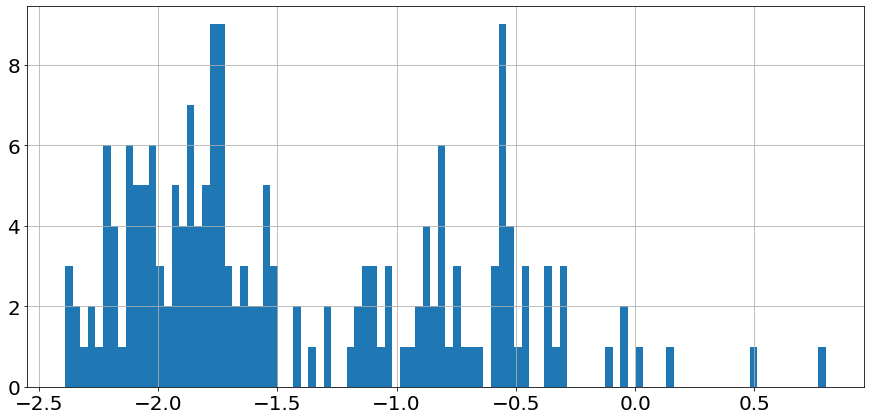

In [208]:
plt.hist(data['Redox Potential'],bins=100);

<BarContainer object of 21 artists>

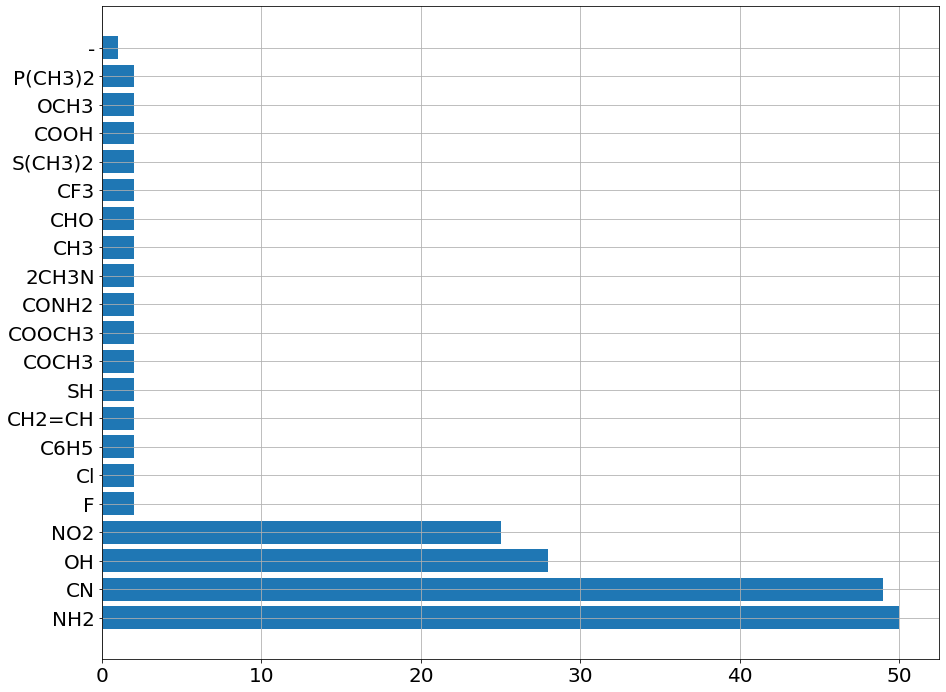

In [180]:
#seed=200
fg_dist=data['FG_name'].value_counts()
plt.figure(figsize=(15,12))
plt.barh(fg_dist.index,fg_dist)
# plt.xticks(rotation=90);

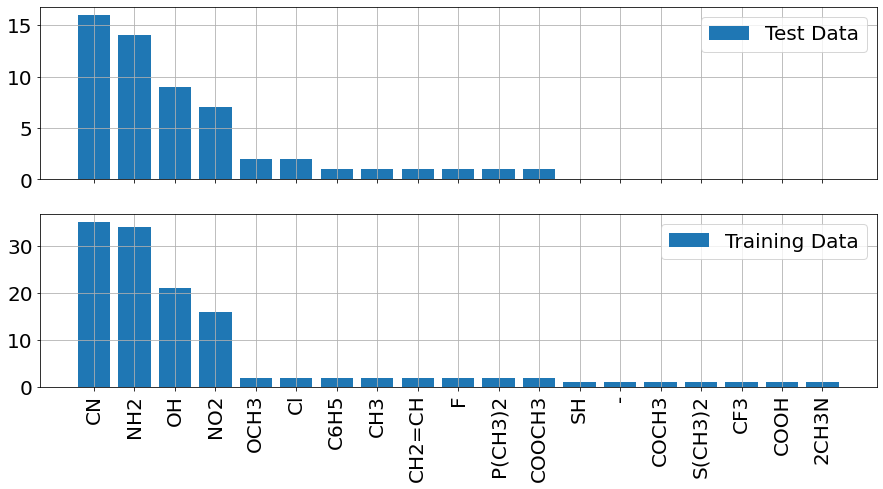

In [181]:
#seed=200
train_dist=data.iloc[X_train.index]['FG_name'].value_counts()
test_dist=data.iloc[X_test.index]['FG_name'].value_counts()
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')
plt.xticks(rotation=90)
ax1.legend()
ax2.legend()

# Features


* **SlogP_VSA1 - SlogP_VSA12** - Sum of van der Waals surface area (in Å2) over all atoms such that SlogP is in a specified range [[1](http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm)]


* **SlogP** - Log of the octanol/water partition coefficient (including implicit hydrogens). This property is an atomic contribution model [[Crippen 1999](https://pubs.acs.org/doi/full/10.1021/ci990307l)] that calculates logP from the given structure; i.e., the correct protonation state (washed structures). Results may vary from the logP(o/w) descriptor. The training set for SlogP was ~7000 structures.


* **fr_NH0** - Number of Tertiary amines


* **fr_NH2** - Number of Primary amines


* **fr_ArN** - Number of N functional groups attached to aromatics


* **fr_aniline** - Number of anilines


* **VSA_EState1 - VSA_EState10** MOE-type descriptors using EState indices and surface area contributions (developed at RD, not described in the CCG paper)[[2](http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)]


* **E-statesindex** - Electrotopological State index for atoms in a molecule. Encode the topology and electronic environment of molecular fragments. This index combines both the electronic character and the topological environment of each skeletal atom in a molecule [[3](https://pubs.acs.org/doi/pdf/10.1021/ci00001a012),[4](https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment),[5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/)]


* **HallKierAlpha** - Sum of ratio of non-c(sp3) atoms covalent radii of the atom to the sp3 carbon over summed over all atoms in a molecule [[6](https://onlinelibrary.wiley.com/doi/abs/10.1002/9780470125793.ch9)]


* **Chi(1/2)n** - Atomic connectivity index (order 1/2) in the hydrogen suppressed graph .This is calculated as the sum of 1/sqrt(didj) over all bonds between heavy atoms i and j where i < j. di (number of heavy neighbors)


* **Ipc** - information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule


* **Chi3v** - Atomic valence connectivity index (order 3). This is calculated as the sum of 1/sqrt(vivj) over all bonds between heavy atoms i and j where i < j. For a heavy atom i let vi = (pi - hi) / (Zi - pi - 1) where pi is the number of s and p valence electrons of atom i.


* **BertzCT** - A topological index meant to quantify "complexity" of molecules. Consists of a sum of two terms, one representing the complexity of the bonding, the other representing the complexity of the distribution of heteroatoms (from graph theory)


* **Kappa3** - Third kappa shape index: (n-1) (n-3)2 / p32 for odd n, and (n-3) (n-2)2 / p32 for even n. n denotes the number of atoms in the hydrogen suppressed graph. Also, let p2 denote the number of paths of length 2 and p3 the number of paths of length 3


* **PEOE_VSA9** - calculated using partial using partial charges and van der waals surface area contributions of atoms


* **labuteASA** - Water accessible surface area calculated using a radius of 1.4 A for the water molecule. A polyhedral representation is used for each atom in calculating the surface area.


* **SMR_VSA(0-7)** - based on an approximate accessible van der Waals surface area (in Å2) and contribution to Molar Refractivity, summed over all atoms


* **MinAbsPartialCharge** - self-explanatory


* **MaxAbsEStateIndex** - Maximum Absolute Electrotopological State index of molecule


* **balabanJ** - Balaban's connectivity topological index

### References: 
1. http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm, https://www.juit.ac.in/attachments/biomin/help.html


2. http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors


3. https://pubs.acs.org/doi/pdf/10.1021/ci00001a012


4. https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment


5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/


6. Hall, L.H., Kier, L.B.; The Molecular Connectivity Chi Indices and Kappa Shape Indices in Structure-Property Modeling; Reviews of Computational Chemistry 2


* [Crippen 1999] - Wildman, S.A., Crippen, G.M.; Prediction of Physiochemical Parameters by Atomic Contributions; J. Chem. Inf. Comput. Sci. 39 No. 5 (1999) 868–873




* **Graph Descriptors** - https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/GraphDescriptors.py


* **MOE** - MOE (Molecular Operating Environment) 2011 software were used to calculate about 300 molecular descriptors for each of these compounds


* **SMR** - molar refractivity (MR), a common descriptor accounting for molecular size and polarizability (https://pubs.acs.org/doi/full/10.1021/ci990307l)

* https://www.researchgate.net/figure/Molecular-descriptors-used-and-their-explanation-adapted-from-MOE-tutorial-Chemical_tbl1_225274017

* **fr** - http://rdkit.org/docs/source/rdkit.Chem.Fragments.html

* **BertzCT** - https://pubs.acs.org/doi/pdf/10.1021/ja00402a071

* **balabanJ** - https://www.sciencedirect.com/science/article/pii/0009261482800092


# List of All Descriptors Used in Training

In [23]:
list(X.columns)

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',